In this module, we'll
# Machine Learning Process
1. Define the problem
2. Collect the data
3. Prepare the data
4. Evaluate the algorithms
5. Improve the results
6. Present the results

- start with the types of ML problems and the types of ML algorithms
- Frame the problem and look at the big picture
  - are we trying to get an estimate for the price
  - or just a category indicating (cheap, medium, expensive), in that case, accuracy is not important, and this could become a classification problem
- selecting a performance measure
  - RSME
  - MAE
  - both of theses are ways to measure the distance between two vectors (the vectors are the predictions and the labels)
- introduce cost function
- introduce the terminology and notations
- Splitting the data into training and test sets
- Computers don't generate truly random numbers, so we need to set the seed
  - https://www.statisticshowto.com/random-seed-definition/#:~:text=Generator%20in%20Excel.-,What%20is%20a%20Random%20Seed%3F,Henkemans%20%26%20Lee%2C%202001).
- Feature Scaling
  - https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

- scikit-learn has:
  - estimators
  - transformers
  - predictors
  - They can be chained together using pipelines


In [1]:
from sklearn import linear_model
import pandas as pd

X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
display(df)

reg = linear_model.LinearRegression()
reg.fit(df[["x1", "x2"]], df['y']).coef_

,x1,x2,y
0,0,0,0
1,1,1,1
2,2,2,2


array([0.5, 0.5])

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
diabetes.frame.head()

# diabetes.DESCR

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
from zlib import crc32
import numpy as np

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

print(crc32(np.int64('1')) & 0xffffffff)
print(crc32(np.int64(4294967296)) & 0xffffffff)
print(0xffffffff)
print(2**32)

2844319735
3718166540
4294967295
4294967296


# Regression
This week we'll talk about one supervised learning technique and algorithm. which is used to predict (continuous) values.
it's a statistical tool for modeling the relationship between a dependent variable (the target) and one or more independent variables (explanatory variable).
that is linear regression.

we'll start with a simple linear regression model, then we'll talk about multiple linear regression, and finally we'll talk about polynomial regression.
## outline
- introduction
- notations
- simple linear regression
  - performance measure AKA cost function (RMSE)
  - gradient descent
- multiple linear regression
- polynomial regression
- linear regression with scikit-learn
- effects of features on the model
- Feature Engineering
  - how to choose the features
  - how to deal with categorical features (ordinal, nominal)




## Module Overview
We've talked about what machine learning is, the different problems it can help us solve, and the different types of machine learning algorithms. In this module, we'll talk about one of the supervised learning techniques, typically used for predicting numerical values. We'll start with a simple linear regression model, then we'll talk about multiple linear regression, and finally we'll talk about polynomial regression.
These are supervised learning algorithms, which means that we'll need to provide labeled data to train the model. We'll also talk about the different performance measures that we can use to evaluate the model's performance. We'll also perform some steps of feature engineering, and practice dealing with categorical data, choosing the best features in your data.
This is out first module where we'll be using the Scikit-Learn library. We'll learn how to use it to train our models, and how to use it to make predictions.

Let's just get to it.

## Introduction
Linear Regression and Polynomial Regression are supervised regression algorithms.

Supervised meaning we use labeled data to train the model.
Regression meaning we predict numerical values instead of categories of classes.

regression finds relationships between a target variable or the variables we're trying to predict, and one or more features or the explanatory variables we're using to predict it.
and depending on the number of features we're using, or the model complexity, we can have simple linear regression, multiple linear regression, or polynomial regression.

Let's talk about one at a time.

For example, I have this dataset that shows 30 signals or 30 observation of years of education, seniority level, and and income. Data that was collected from 30 different people.


In [4]:
# import csv file
import pandas as pd

income_df = pd.read_csv('data/income2.csv')
income_df

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922
5,18.275862,26.206897,71.504485
6,19.931034,150.344828,87.970467
7,21.172414,82.068966,79.811030
8,20.344828,88.275862,90.006327
9,10.000000,113.103448,45.655529


If we EDA this data, we can see that there is a positive correlation between years of education and income, and a positive correlation between seniority level and income.

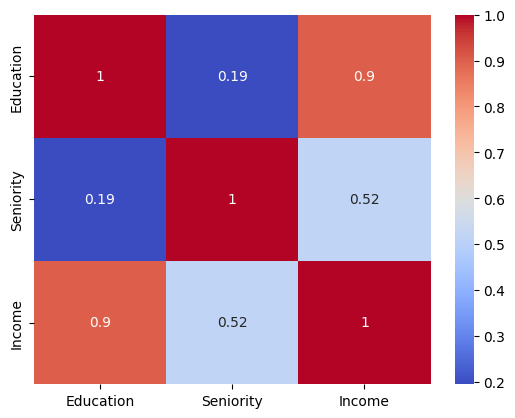

In [5]:
# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

income_corr = income_df.corr()
sns.heatmap(income_corr, annot=True, cmap='coolwarm')
plt.show()

It's a quite strong correlation between education and income (0.9), and a slightly weaker correlation between seniority level and income (0.52).

In simple linear regression, we're trying to predict a single value, using a single feature to predict it.

let's visualize the data using a scatter plot. We can clearly see that there is a positive correlation between years of education and income. Linear Regression will allow us to find the best fit lin or best fit model that will allow us to predict the income of a person given their years of education.

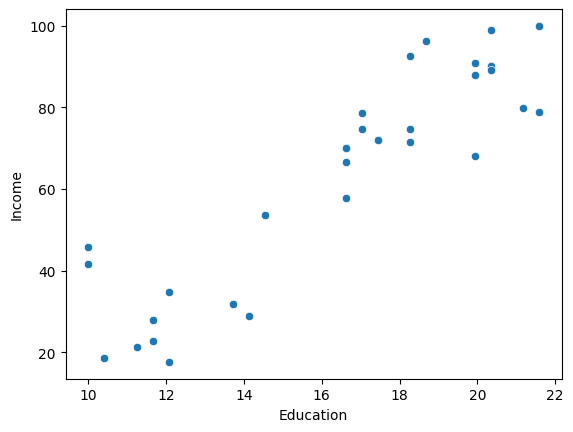

In [6]:
# Visualize a scatter plot between income and education
sns.scatterplot(x='Education', y='Income', data=income_df)
plt.show()

But we have another feature, seniority level, that we can use to predict income. We can use both features to predict income, and this is called multiple linear regression.

Let's visualized the relationship between those 3 variables using a 3D scatter plot.

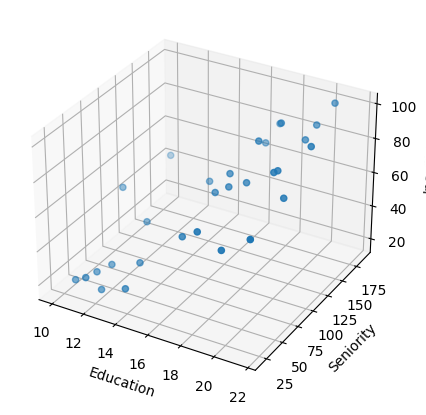

In [7]:
# visualize a 3d scatter plot between Education, Seniority, and Income using mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(income_df['Education'], income_df['Seniority'], income_df['Income'])
ax.set_xlabel('Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
plt.show()

ok we kind of see the relationship, but I think an interactive plot will be better. so let's recreate this using plotly.

In [8]:
# visualize a 3d scatter plot between Education, Seniority, and Income using plotly
import plotly.express as px


fig = px.scatter_3d(income_df, x='Education', y='Seniority', z='Income')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


![3d scatter plot](assets/3d-income.gif)

- Look at the different relationships between the 3 variables.
- visualize them on 2d scatter plots
- show that a surface can cut through that.

we can see that we can get a surface model that can cut through the data points, and this is the best fit model. Once we start using more than one variable as independent variables, or explanatory variables, that's multiple linear regression.

polynomial regression is a special case of multiple linear regression, where we're using polynomial features instead of linear features. as in the data is usually can't be described by a straight line or a plane, but by a curve, or a curved surface.

Let me show that on a different dataset here

In [9]:
income2_df = pd.read_csv('data/position_salaries.csv')
income2_df

,Position,Level,Salary
0,Business Analyst,1.0,45000
1,Junior Consultant,2.0,50000
2,Senior Consultant,3.0,60000
3,Manager,4.0,80000
4,Country Manager,5.0,110000
5,Region Manager,6.0,150000
6,Partner,7.0,200000
7,Senior Partner,8.0,300000
8,C-level,9.0,500000
9,C-level,9.5,700000


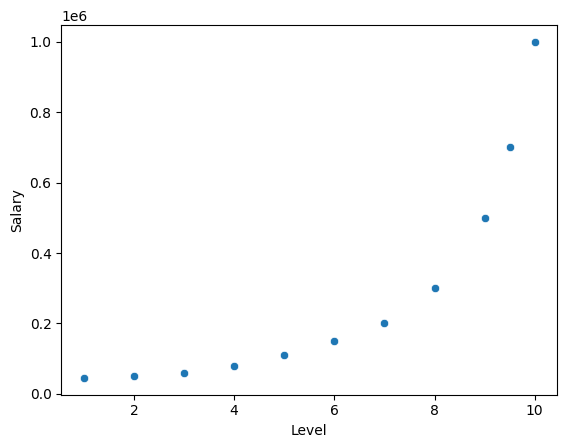

In [10]:
sns.scatterplot(x='Level', y='Salary', data=income2_df)
plt.show()

Obviously, this data can't be described by a straight line, but by a curve. So we can use polynomial features instead of linear features to describe this data.

Now that we know what we want to achieve, let's talk about the notations we'll be using.

See you in the next video.

## Notations
This is a very short video, but it's very important. It introduces the notations we'll be using throughout the course. you'll find that a lot of this notations are used in other machine learning algorithms, and in other machine learning courses and books.
so it's important to understand them.

Let's start with the generic machine learning notations.
Now, whenever you have a dataset, which is a collection of data points:
- you have an (m) number of (records, observations, signals, instances, data point), these are all synonyms.
- Each one of those data points is represented by a vector of (n, k) number of (features, independent variables, explanatory variables, predictors, dimensions, attributes).
- For supervised learning, you dataset would also have a label for each of those (m) records. Labels are also known as: targets, dependent variables, or a responses, maybe classes, or a categories if it's a class.

so given the following dataset, we can say that:
- we have 30 records, m = 30
- we have 3 features, n = 3
- features are years of education, and seniority level
- target is income

now for linear regression, we have the following notations:
The model is often represented in latex as:

$$\hat{y} = h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + + \theta_{n}x_{n}$$

where:

- X: input features
- i: index of the feature
- x(i): the ith instance of the input variable
- y(i): the ith instance of the output variable
- yˆ: the predicted value of y
- theta: the model parameters, or the feature weights



## Simple Linear Regression - Drawing lines and performance measure
In this video, we'll talk about simple linear regression, which is a special case of multiple linear regression, where we're using a single feature to predict a single value.
As we've mentioned before, the goal here is find the best fitting line that describes the relationship between the features and the target.

Here obviously, this line better describes the relationship than this line.
![linear regression: good and bad](./assets/linear-good-bad.png)

but how do we find that line? from Algebra, we know that the formula for a line is:

$$y = mx + c$$

where:
- m: slope
- c: y-intercept



In [31]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 11)
def plot_line(y, color):
  y_ = eval(y)
  plt.plot(x, y_, label=f'y={y}', marker='o', markersize=5, color=color)
  plt.legend(loc='best')
  plt.xlabel('x')
  plt.ylabel('y')

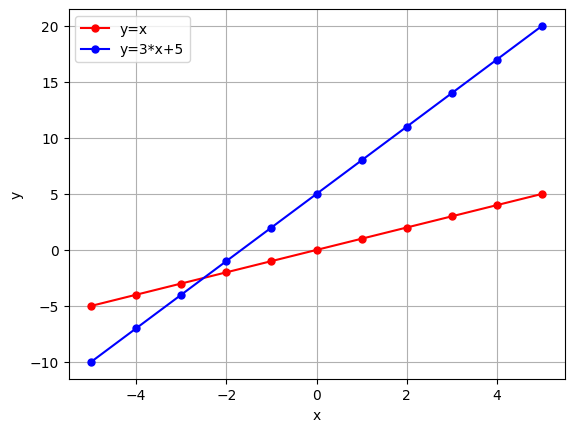

In [34]:
plot_line(y='x', color='red')
plot_line(y='3*x+5', color='blue')
# plot_line(y='0.5*x+4', color='green')
# plot_line(y='2*x', color='purple')

plt.grid()
plt.show()



and we can adjust the slope and the y-intercept to draw any line you want.

and you may remember how you can find a line that passes through 2 points, using the following formula:

$$y = \frac{y_{2} - y_{1}}{x_{2} - x_{1}}x + b$$

where:
- b: y-intercept
- the fraction is the slope

but for this dataset, we can't just arbitrarily choose 2 points to draw a line. It may be close enough, but it wouldn't be the best fit line. 
Actually, how would you know that what you have is a good fit? For that we need to define a performance measure, or a cost function, that will allow us to evaluate the model's performance.

Now there are many different performance measures, the most common of which is that we get the mean of the squared errors or residuals. 
What does that mean? well, we take the difference between the actual value and the predicted value, and we square it (so that we lose the negative sign). and we do that for all the data points, and we get the mean of those squared errors.

$$\frac{1}{m}\sum_{i=1}^{m}(y_{i} - \hat{y_{i}})^{2}$$


Obviously, the smaller the mean of the squared errors, the better the model is. So we want to find the line that minimizes the mean of the squared errors.

Let's see an example here.



In [68]:
# a pandas dataframe with 2 columns: x and y
import pandas as pd
import numpy as np

x = [1, 1.5,2.5,3,4]
y = [1, 2.3,2.1,3,2.9]

df = pd.DataFrame({'x': x, 'y': y})

The easiest way to do this, is to draw a line, any line, and then calculate the distance between the line and the data points. Then, we square the distance, and we sum all the squared distances, and then we take the square root of the sum. We call this the loss function, or the cost function. and we want to minimize this function.

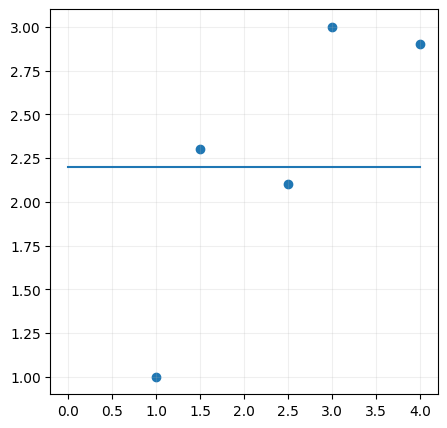

In [71]:
# plot the data
import matplotlib.pyplot as plt

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')

ax.grid(alpha=0.2)
plt.show()

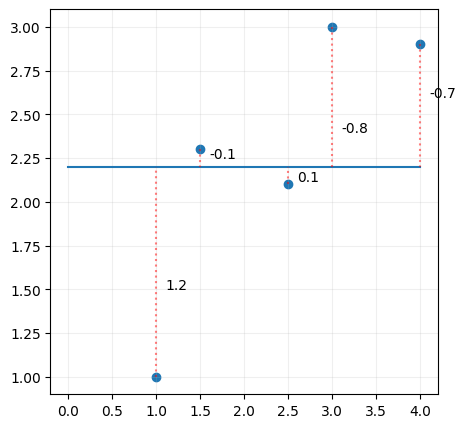

In [69]:
# plot the data
import matplotlib.pyplot as plt

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')

# Residuals
ax.plot([1,1],[1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '1.2')
ax.plot([1.5,1.5],[2.3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '-0.1')
ax.plot([2.5,2.5],[2.1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.1')
ax.plot([3,3],[3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '-0.8')
ax.plot([4,4],[2.9, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '-0.7')

ax.grid(alpha=0.2)
plt.show()

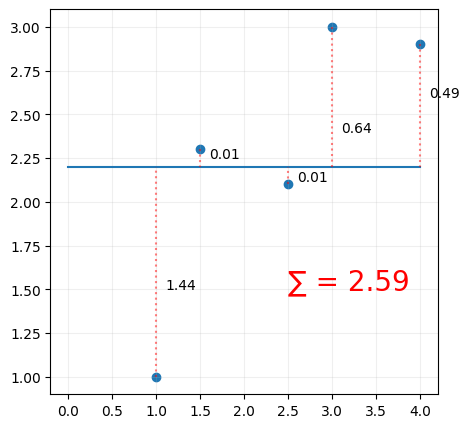

In [70]:
# plot the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')
# ax.set_ylim(0)
# ax.set_xlim(0)

ax.plot([1,1],[1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '1.44')
ax.plot([1.5,1.5],[2.3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '0.01')
ax.plot([2.5,2.5],[2.1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.01')
ax.plot([3,3],[3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '0.64')
ax.plot([4,4],[2.9, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '0.49')

ax.text(2.5, 1.5, '∑ = 2.59', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

so again:
- measure error
- Square it
- sum it


Then we change the parameters, change the line, and you calculate the loss function again, and you keep doing this until you find the line that minimizes the loss function.

![loss function](./assets/loss.png)


so far so good, but how do we get this minimum in the loss?

we use a formula called gradient descent. this function is used in many machine learning algorithms, not just linear regression. Let's talk about it in the next video.

## Gradient Descent
In this video, we'll talk about gradient descent, which is a very important algorithm in machine learning. It's used in many machine learning algorithms, not just linear regression.
it's an optimization algorithm that helps us find the minimum of a function. In our case, we want to find the minimum of the loss function.

supposed you're on a mountain, it's dark, it's foggy, and you can only feel the slope of the ground below your feet. A good strategy to get down, is that you feel the ground and move it in the direction of the steepest slope. That is exactly what the gradient descent does.

For any of your feature coefficients, you start somewhere and then you calculate the gradient of the slope, and then you move in the direction of the gradient, and then you calculate the gradient again, and then you move in the direction of the gradient, and it keeps doing this until it reaches the minimum.

$$\theta^{ next step} = \theta - \eta . MSE(\theta) $$
where:
- theta: the feature coefficient
- eta: the learning rate

Now if you're 

I think going over the math behind this formula is a bit out of scope for this course, but I'll leave a link to a video that explains it in detail.

## Notes
- feature scaling is important for gradient descent
- explain how the algorithm works
- data splitting
- https://medium.com/@thaddeussegura/simple-linear-regression-in-200-words-eb0835324af5
https://medium.com/@thaddeussegura/multiple-linear-regression-in-200-words-data-8bdbcef34436
https://medium.com/@thaddeussegura/polynomial-regression-in-200-words-2b1f4f8b5c5a

Finally we'll end the module with a complete end-to-end example of a machine learning project with all of its cleaning, preprocessing steps.